In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)                       # Random seed

X = np.random.randn(300, 2)              # Features (n=300, p=2) from standard bivariate normal
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Simple linear decision boundary; x1 + x2 > 0
                                         # beta_0 = 0, beta_1 = beta_2

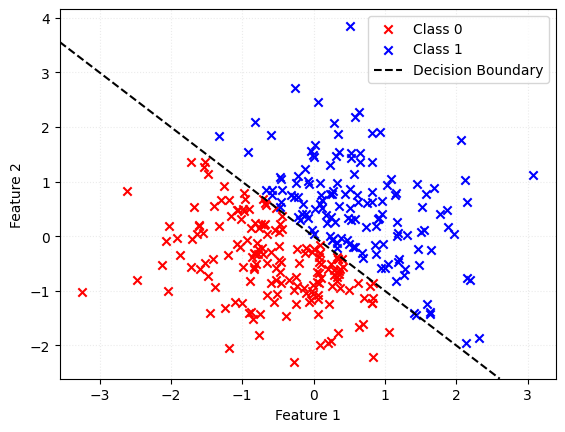

In [3]:
# Visualize the data
plt.figure(1, dpi=100)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='x', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')
plt.axline((0, 0), slope=-1, color='k', linestyle='--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle=':', alpha=.25)
plt.legend()
plt.show()

In [4]:
def sigmoid(z):
    """
    Arguments:
        z: 1d array of shape (n, )
    """
    return 1 / (1 + np.exp(-z))

In [5]:
def binary_cross_entropy(y, y_pred, eps=1e-7):
    """
    Arguments:
        y: 1d array of shape (n, )
        y_pred: 1d array of shape (n, )
    """
    bce = -1 * (
        y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps)
    )
    return bce

In [6]:
def compute_logit(X, beta):
    """
    Arguments:
        X: 2d array of shape (n, p)
        beta: 1d array of shape (1+p, )
    """

    assert X.shape[1] == len(beta) - 1  # 2 == 3 -1
    n = X.shape[0]

    ones = np.ones(n).reshape(-1, 1)       # (n, 1)
    X = np.concatenate((ones, X), axis=1)  # (n, 1+p)

    return np.matmul(X, beta)  # (n, ) <- (n, 1+p) @ (1+p, )

In [7]:
def compute_cost(X, y, beta):
    """
    Arguments:
        X: 2d array of shape (n, p)
        y: 1d array of shape (n,  )
        beta: 1d array of shape (1+p,  )
    """

    z = compute_logit(X, beta)           # (n, )
    pred = sigmoid(z)                    # (n, )
    bce = binary_cross_entropy(y, pred)  # (n, )
    cost = bce.mean()                    # (1, )

    return cost  # (1, )

In [8]:
def gradient_descent(X, y, beta, learning_rate=0.01, max_iter=100):

    """
    Arguments:
        X: 2d array of shape (n, p)
        y: 1d array of shape (n,  )
        beta: 1d array of shape (1+p,  )
        learning_rate: float > 0
        max_iter: int > 0
    """

    n = X.shape[0]
    ones = np.ones(n).reshape(-1, 1)

    cost_history = []
    gradient_history = []
    for i in range(max_iter):

        z = compute_logit(X, beta)  # (n, )
        pred = sigmoid(z)           # (n, )

        X_tmp = np.concatenate((ones, X), axis=1)  # (n  , 1+p)
        gradient = 1/n * X_tmp.T @ (pred - y)      # (1+p,    ) <- (1+p, n) @ (n, )

        beta = beta - learning_rate * gradient     # (1+p, )

        if i % 10 == 0:
            cost = compute_cost(X, y, beta)    # compute cost
            cost_history.append(cost)          # save cost
            gradient_history.append(gradient)  # save gradient

    return beta, cost_history, gradient_history

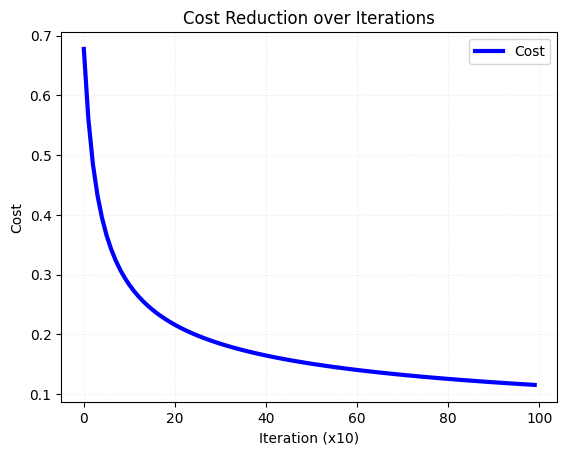

In [9]:
# Initial parameters
beta = np.zeros(3)

# Configurations
LEARNING_RATE = 0.1
MAX_ITER = 1000

# Run gradient descent
updated_beta, cost_history, gradient_history = gradient_descent(X, y, beta, learning_rate=LEARNING_RATE, max_iter=MAX_ITER)

# Plot the cost history
plt.figure(2, dpi=100)
plt.plot(cost_history, linewidth=3, color='b', label='Cost')
plt.xlabel('Iteration (x10)')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations')
plt.grid(True, linestyle=':', alpha=.25)
plt.legend()
plt.show()

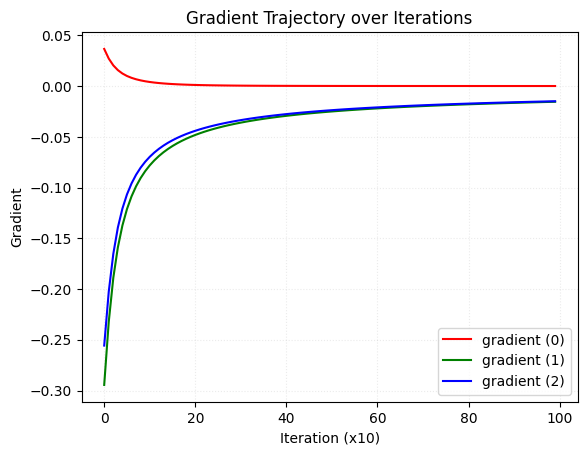

In [10]:
colors = 'rgb'

plt.figure(3, dpi=100)
for j in range(beta.shape[0]):
    plt.plot([g[j] for g in gradient_history], color=colors[j], label=f'gradient ({j})')

plt.xlabel('Iteration (x10)')
plt.ylabel('Gradient')
plt.title('Gradient Trajectory over Iterations')
plt.grid(True, linestyle=':', alpha=.25)
plt.legend()
plt.show()

In [11]:
beta_0_hat = updated_beta[0]
beta_1_hat = updated_beta[1]
beta_2_hat = updated_beta[2]

print(f"b0: {beta_0_hat:.3f} | b1: {beta_1_hat:.3f} | b2: {beta_2_hat:.3f}")

b0: -0.174 | b1: 3.984 | b2: 3.647


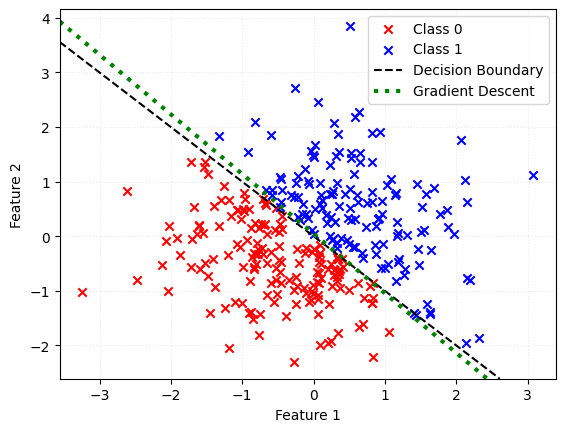

In [12]:
# Visualize the data
plt.figure(4, dpi=100)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='x', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')
plt.axline((0, 0), slope=-1, color='k', linestyle='--', label='Decision Boundary')
plt.axline((0, -beta_0_hat/beta_2_hat), slope=-beta_1_hat/beta_2_hat, color='g', linestyle=':', linewidth=3, label='Gradient Descent')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle=':', alpha=.25)
plt.legend()
plt.show()